## REGRESION LOGISTICA DANIEL ALEJANDRO HERRERA MEJIA


##### Data set :Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad cardíaca.

In [24]:
#vamos a Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Cargamos el dataset
data = pd.read_csv("heart_cleveland_upload.csv")

#### Aunque no es obligatorio, vamos a traducir el nombre de cada campo además de describir la información que contiene, con el fin poder comprender mejor el conjunto de datos y poder encontrar aquellos campos con valores atípicos o inusuales.

In [26]:

# Crear los datos
campos_originales = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "condition"
]

traducciones_es = [
    "edad en años",
    "sexo (1 = masculino; 0 = femenino)",
    "tipo de dolor torácico (0: angina típica, 1: atípica, 2: no anginoso, 3: asintomático)",
    "presión arterial en reposo (mmHg)",
    "colesterol sérico (mg/dl)",
    "glucemia en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)",
    "electrocardiograma en reposo (0: normal, 1: anomalía ST-T, 2: hipertrofia ventricular)",
    "frecuencia cardíaca máxima",
    "angina inducida por ejercicio (1 = sí; 0 = no)",
    "depresión del ST por ejercicio",
    "pendiente del ST (0: ascendente, 1: plano, 2: descendente)", 
    "número de vasos principales (0–3)",
    "resultado talio (0: normal, 1: defecto fijo, 2: reversible)",
    "presencia de enfermedad cardíaca (0 = no; 1 = sí)"
]

tabla_traducciones = pd.DataFrame({
    "Campo original": campos_originales,
    "Traducción al español": traducciones_es
})

# Visualizar con estilo atractivo (HTML)
tabla_traducciones.style.set_properties(**{
    'background-color': '#f9f9f9',
    'color': '#333',
    'border-color': '#aaa',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'left',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#B6D7A8'), ('font-weight', 'bold')]}
])


,Campo original,Traducción al español
0,age,edad en años
1,sex,sexo (1 = masculino; 0 = femenino)
2,cp,"tipo de dolor torácico (0: angina típica, 1: atípica, 2: no anginoso, 3: asintomático)"
3,trestbps,presión arterial en reposo (mmHg)
4,chol,colesterol sérico (mg/dl)
5,fbs,glucemia en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)
6,restecg,"electrocardiograma en reposo (0: normal, 1: anomalía ST-T, 2: hipertrofia ventricular)"
7,thalach,frecuencia cardíaca máxima
8,exang,angina inducida por ejercicio (1 = sí; 0 = no)
9,oldpeak,depresión del ST por ejercicio


In [62]:
#Visualizamos nuestra tabla
data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [64]:
# Descripción de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [33]:
#identificamos que columnas tienen valores nulos y corregimos
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

##### Podemos observar que ninguna columna tiene valores nulos, de la misma manera que la mayoría de las columnas tienen valores en 0, se considera normal por ser variables categóricas, como vemos en la tabla que describe nuestros campos.

1. campos que son aceptados en cero son (sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,condition) 


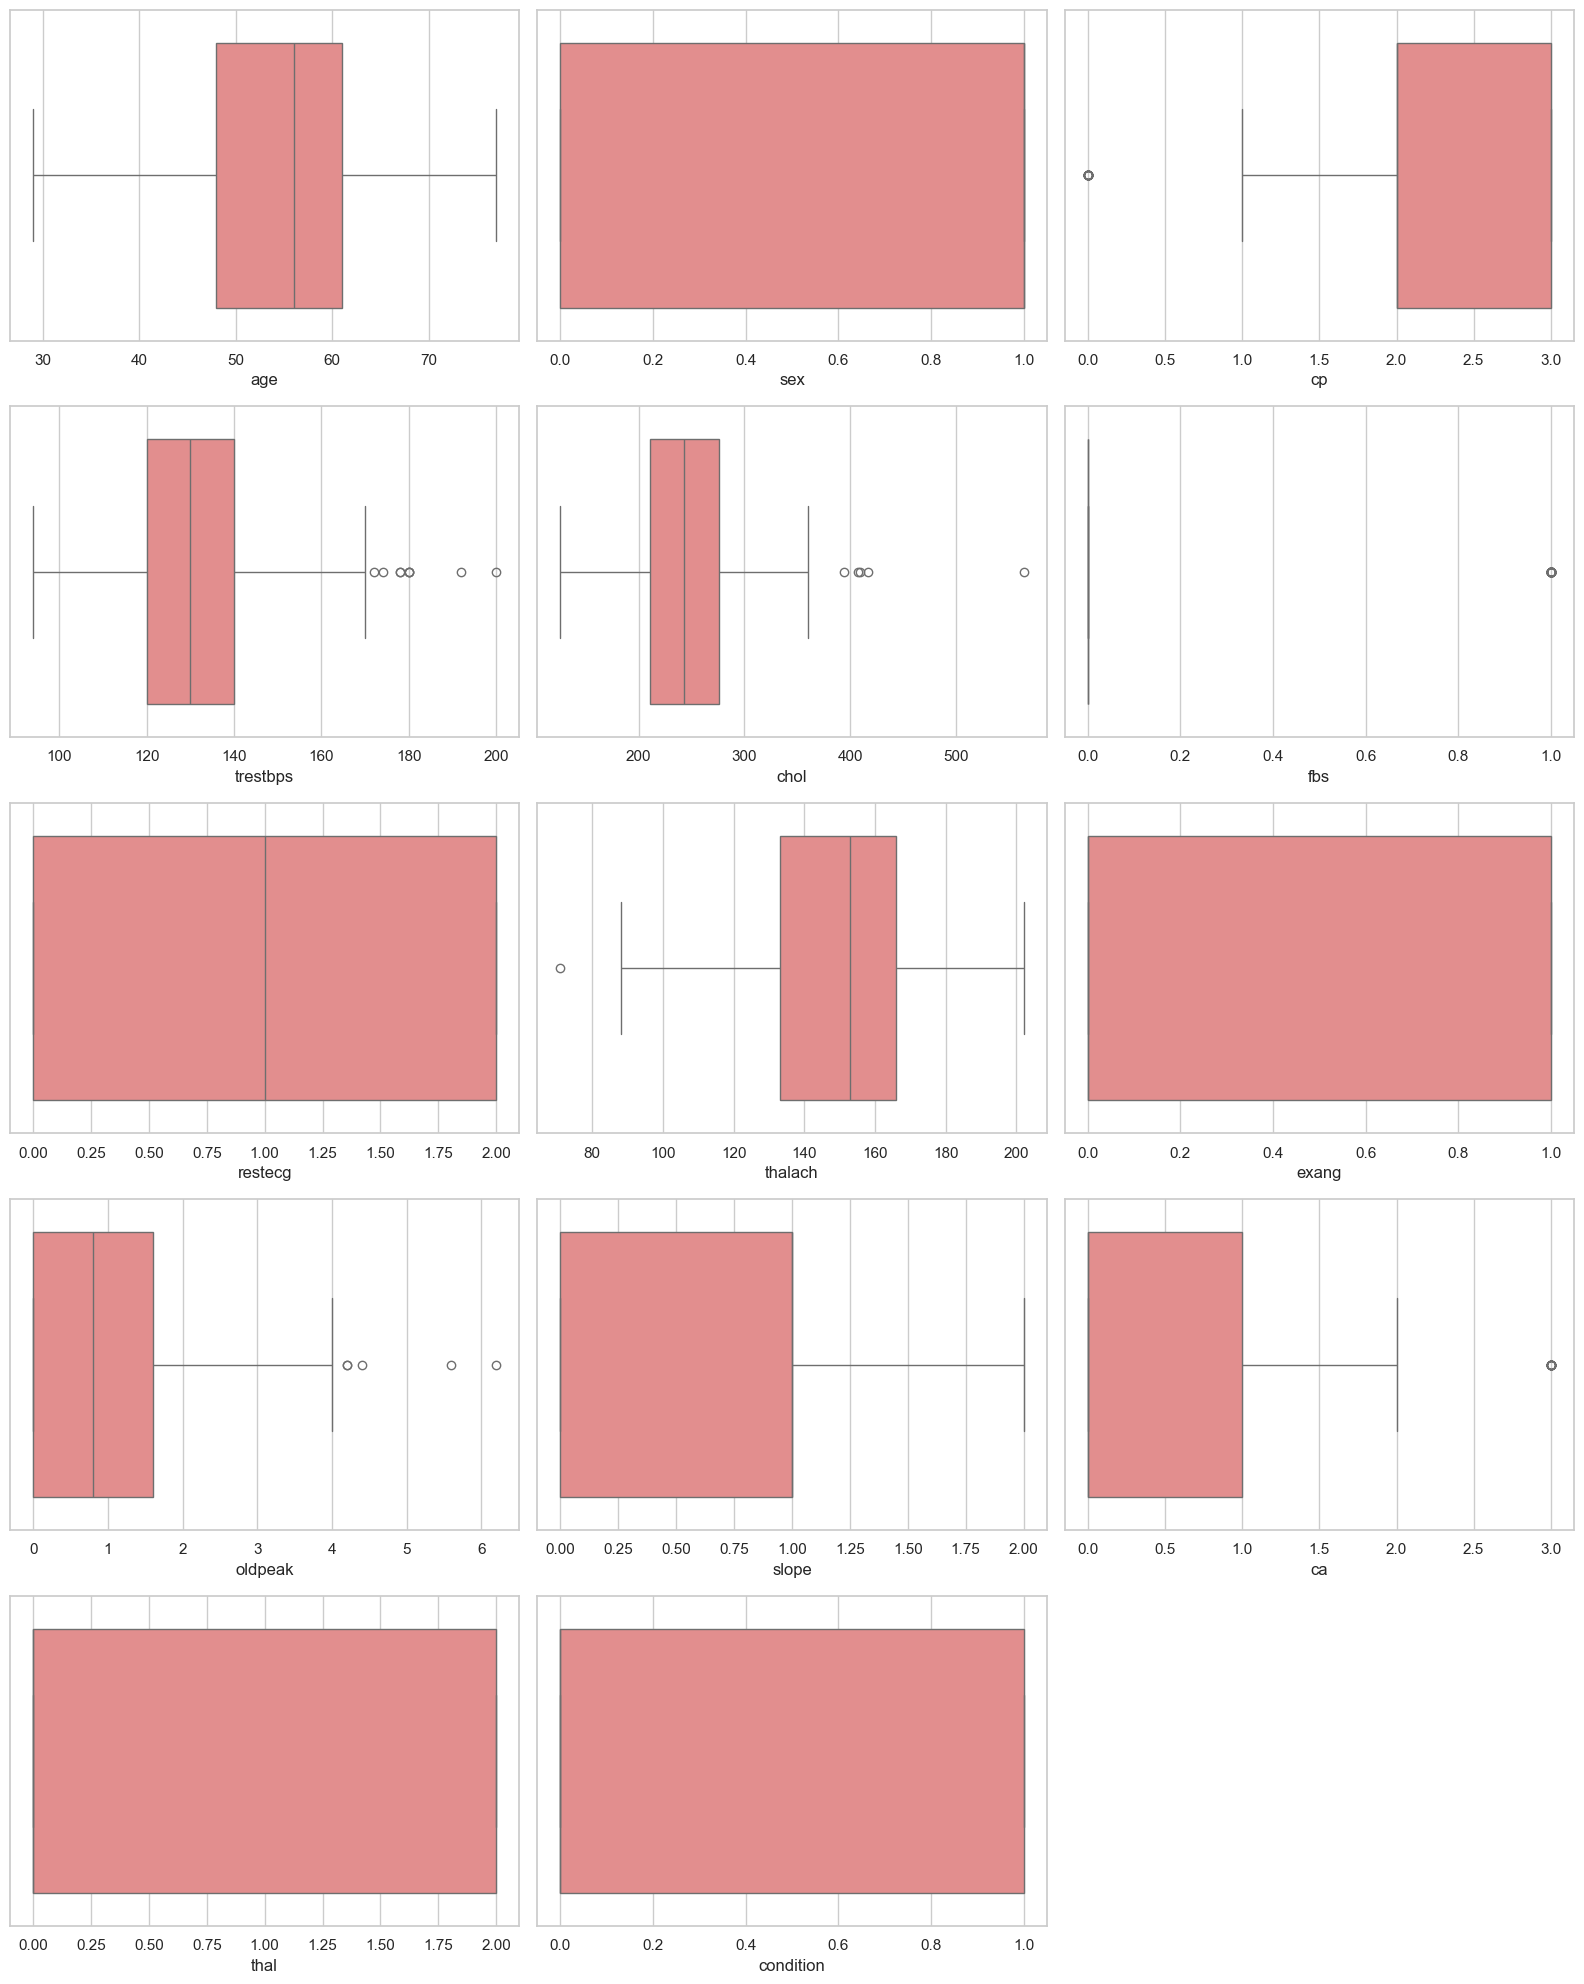

In [56]:

# Lista de campos para analizar
campos = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "condition"
]

# Estilo de visualización
sns.set(style="whitegrid")

# Crear los diagreamas
plt.figure(figsize=(16, 20))
for i, campo in enumerate(campos, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=data, x=campo, color='lightcoral')
    #plt.title(f'campo {campo}')
    plt.xlabel(campo)

plt.tight_layout()
plt.show()

Los valores analizados en los diferentes diagramas parecen normales y están dentro de los estándares médicos , ademas coinciden con la descripción de cada campo.

#### Ahora necesitamos predecir los datos utilizando mediante regresión logística.

Característica de interes:

1. presencia de enfermedad cardíaca (0 = no; 1 = sí)
2. predecir si la persona puede tener presencia de enfermedad cardíaca

In [90]:
#total de personas con condicion cardiaca
data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

usaremos un porcentaje de datos para entrenamiento (train) = 70% , y para prueba (test) = 30%

In [93]:
X = data.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = data['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state= 10)

In [95]:
#vemos el X_train
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
222   58    1   3       100   234    0        0      156      0      0.1   
45    54    1   1       192   283    0        2      195      0      0.0   
7     61    1   0       134   234    0        0      145      0      2.6   
170   65    0   3       150   225    0        2      114      0      1.0   
119   51    1   2       125   245    1        2      166      0      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
250   53    1   3       140   203    1        2      155      1      3.1   
27    63    0   1       140   195    0        0      179      0      0.0   
151   39    1   2       140   321    0        2      182      0      0.0   
226   57    1   3       152   274    0        0       88      1      1.2   

     slope  ca  thal  
222      0   1     2  
45       0   1     2  
7        1   2    

In [97]:
# vemos el X_test
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
122   51    0   2       130   256    0        2      149      0      0.5   
18    45    1   0       110   264    0        0      132      0      1.2   
155   77    1   3       125   304    0        2      162      1      0.0   
41    55    1   1       130   262    0        0      155      0      0.0   
11    59    1   0       160   273    0        2      125      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
13    58    0   0       150   283    1        2      162      0      1.0   
106   56    1   2       130   256    1        2      142      1      0.6   
46    52    1   1       120   325    0        0      172      0      0.2   
230   57    1   3       130   131    0        0      115      1      1.2   
31    58    1   1       120   284    0        2      160      0      1.8   

     slope  ca  thal  
122      0   0     0  
18       1   0     2  
155      0   3    

##### vamos a entrenar el modelo configurando los diferentes hiperparámetros

In [100]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del co

In [102]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
122,51,0,2,130,256,0,2,149,0,0.5,0,0,0
18,45,1,0,110,264,0,0,132,0,1.2,1,0,2
155,77,1,3,125,304,0,2,162,1,0.0,0,3,0
41,55,1,1,130,262,0,0,155,0,0.0,0,0,0
11,59,1,0,160,273,0,2,125,0,0.0,0,0,0
283,43,0,3,132,341,1,2,136,1,3.0,1,0,2
161,67,1,3,120,229,0,2,129,1,2.6,1,2,2
196,61,1,3,140,207,0,2,138,1,1.9,0,1,2
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0
10,59,1,0,170,288,0,2,159,0,0.2,1,0,2


In [104]:
print (Prediccion)

[0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0]


evaluamos el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, entre otras

In [107]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        48
           1       0.73      0.79      0.76        42

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



1. vemos que en la variable condition , es decir enfermedad cardiaca encontramos 48 muestras en para la clase 0  , mientras que para la clase 1 existen 42 muestras
2. todos los verdaderos "0", el modelo detectó correctamente el 75% , mientras  todos los verdaderos "1", detectó correctamente el 79%.
3. F1-Score es bastante balanceado en ambas clases (0.77 y 0.76), lo cual es bueno.

nuestro modelo acertó en el 77% de los casos.

##### elaboramos las diferentes gráficas que permitan visualizar los resultados del modelo

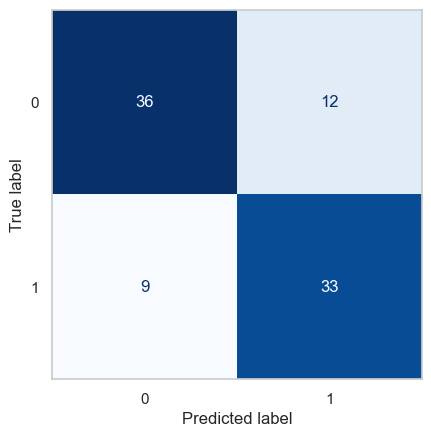

In [120]:

# Crear la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)

# Personalizar el display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Elegir un colormap y quitar la cuadrícula
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax, colorbar=False)  # Puedes cambiar 'Blues' por otro

# Quitar la cuadrícula
ax.grid(False)

# Mostrar la gráfica
plt.show()


El modelo de regresión logística fue evaluado con los siguientes resultados:

1. Verdaderos negativos (Clase 0 correctamente clasificada): 36 casos
2. Falsos positivos (Clase 0 clasificada incorrectamente como 1): 12 casos
3. Falsos negativos (Clase 1 clasificada incorrectamente como 0): 9 casos
4. Verdaderos positivos (Clase 1 correctamente clasificada): 33 casos

Esto indica que el modelo acierta en 69 predicciones de un total de 90 observaciones, resultando en una exactitud (accuracy) del 77%.

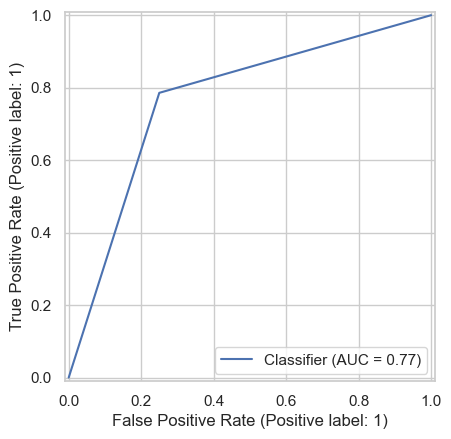

In [126]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

el 77% de los casos, el modelo asigna correctamente una mayor probabilidad de enfermedad a quienes realmente la tienen.